In [2]:
import numpy as np
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
np.random.seed(1111)

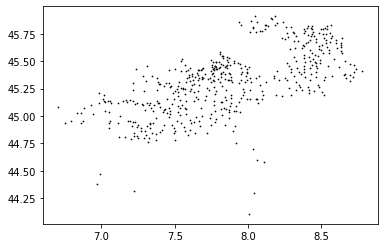

In [3]:
df = pd.read_csv('./data/comuni_lat_long.csv', sep=";")
points = np.array(list(zip(df.lng,df.lat )))[:500]
plt.scatter(x=points[:,0], y=points[:,1],s=2, c="black", marker=".")
plt.show()

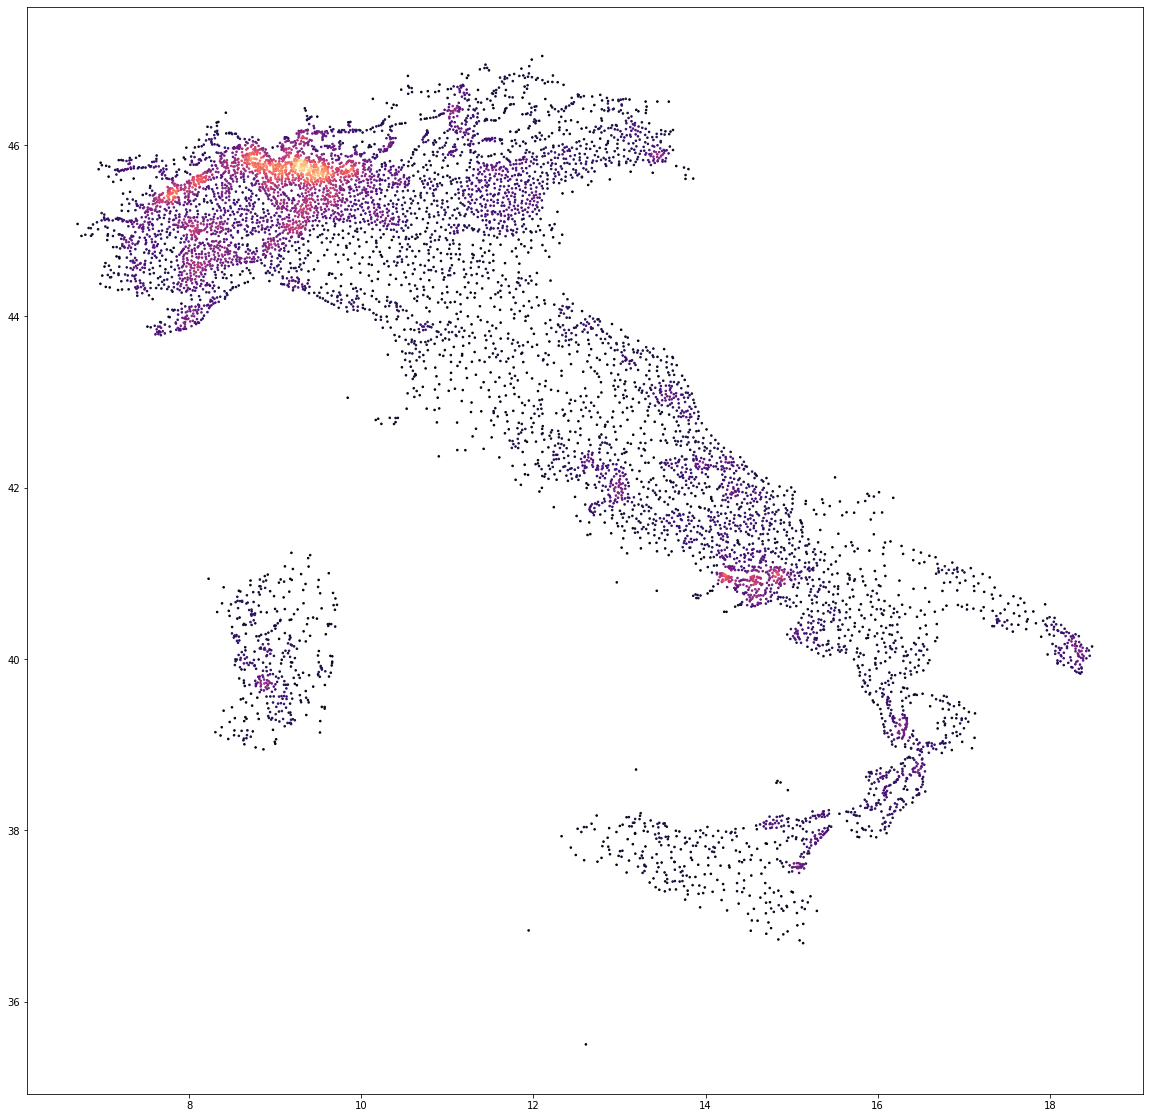

In [4]:
df = pd.read_csv('./data/comuni_lat_long.csv', sep=";")
points = np.array(list(zip(df.lng,df.lat )))

point_tree = spatial.cKDTree(points)
centers = points
density=[]

radius = .1
for group  in  point_tree.query_ball_point(centers, radius): density.append(len(group))
fig,ax=plt.subplots(figsize=(20,20))
plt.scatter(x=points[:,0], y=points[:,1],s=10, cmap="magma",c=density, marker=".")



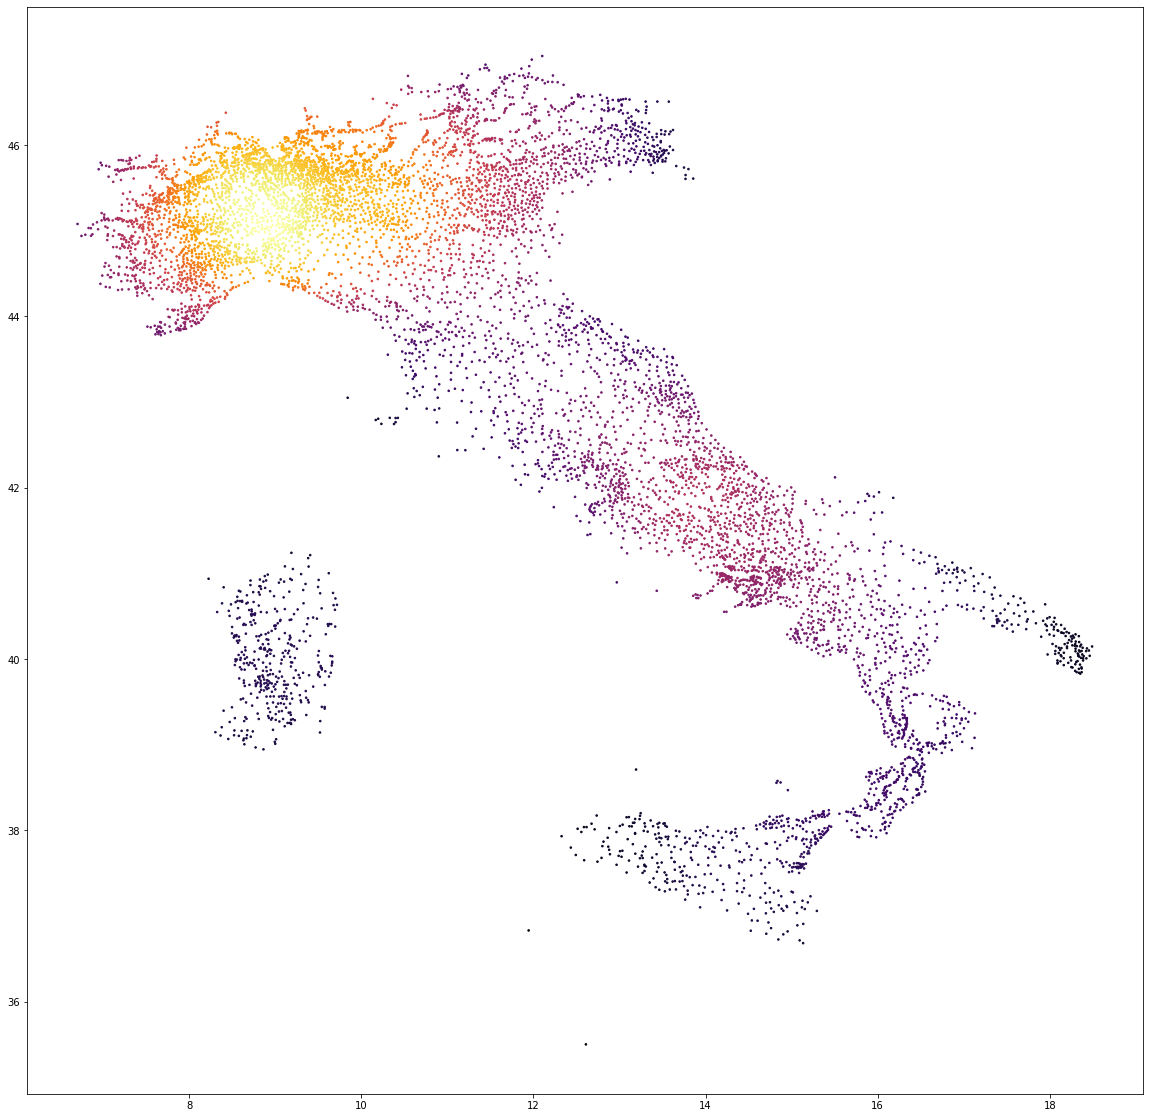

In [5]:

density=[]
radius = 1.5
for group  in  point_tree.query_ball_point(centers, radius): density.append(len(group))
fig,ax=plt.subplots(figsize=(20,20))
plt.scatter(x=points[:,0], y=points[:,1],s=10, cmap="inferno",c=density, marker=".")

In [214]:
df = pd.read_csv('./data/comuni_lat_long.csv', sep=";")
points = np.array(list(zip(df.lng,df.lat )))

nbins=1000
centersX=np.linspace(points[:,0].min(), points[:,0].max(), nbins)
centersY=np.linspace(points[:,1].min(), points[:,1].max(), nbins)

centersX=np.linspace(12, 14, nbins)
centersY=np.linspace(45, 47, nbins)

density=[]

radius = .1


point_tree = spatial.cKDTree(points)
# This finds the index of all points within distance 1 of [1.5,2.5].
for i in range(nbins):
    for j in range(nbins):
    #print(centersX[i],centersY[i])
    #print(points[i,0],points[i,1])
        density.append( len(point_tree.query_ball_point( (centersX[j],centersY[i]) ,radius)) )
    
dd = np.reshape(np.array(density), (nbins,nbins))




In [238]:
dd

array([[6, 6, 6, ..., 0, 0, 0],
       [6, 6, 6, ..., 0, 0, 0],
       [6, 6, 6, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]])

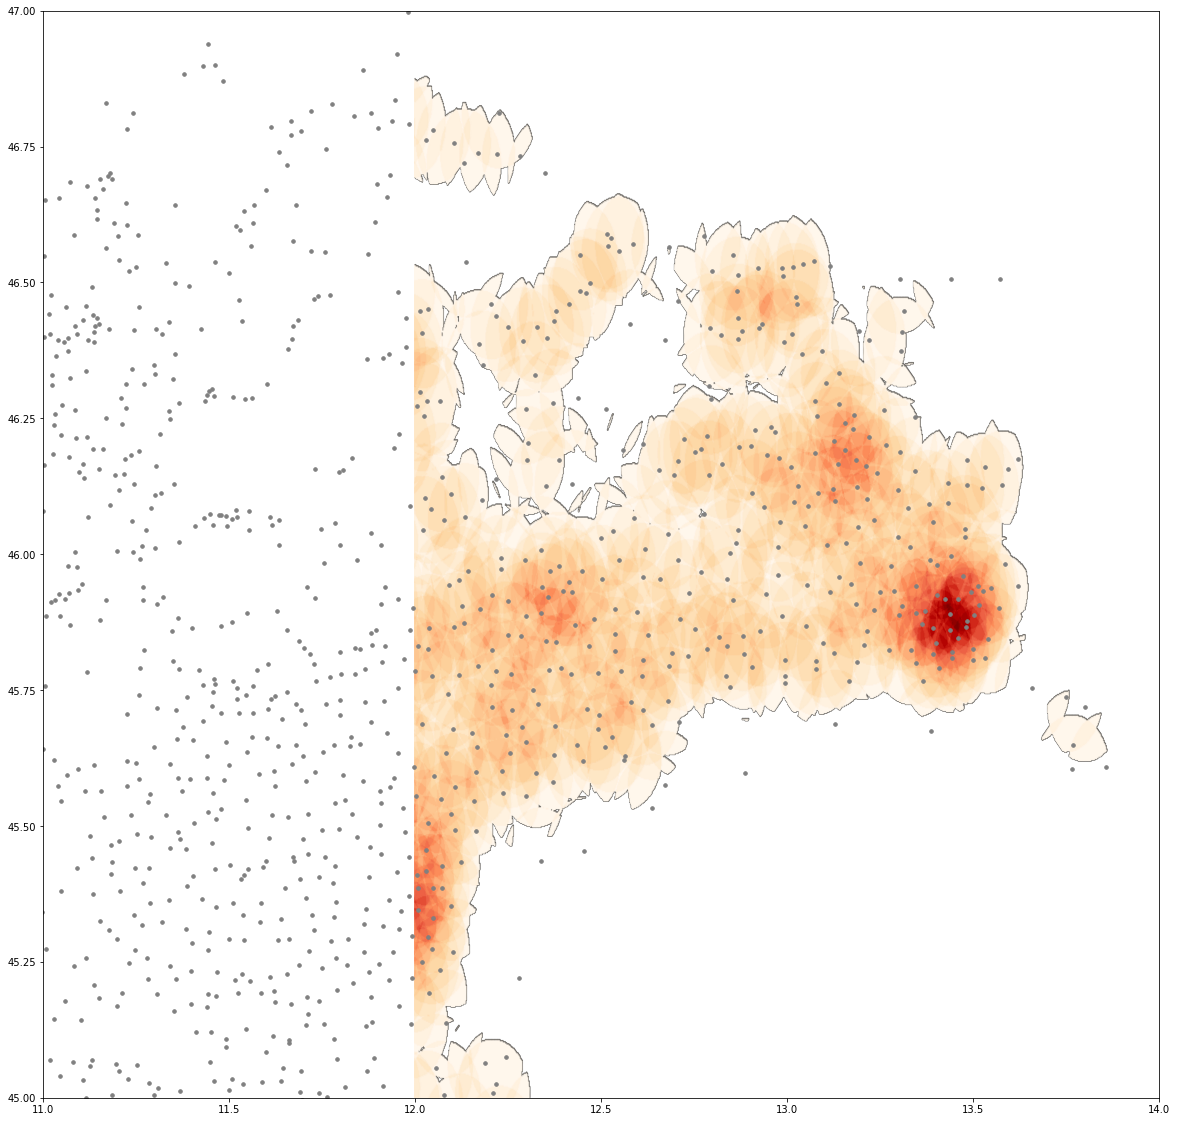

In [245]:


fix,ax1=plt.subplots(nrows=1,ncols=1, figsize=( 20,20))

data_to_plot = dd
tmp = np.reshape(data_to_plot,-1) / np.mean(data_to_plot)
threshold = 1
data_to_plot = np.ma.masked_array(data_to_plot, tmp <threshold)
plt.pcolormesh(centersX,centersY, data_to_plot, shading='gouraud',cmap='OrRd', edgecolor="white" )


points = pd.read_csv('./data/comuni_lat_long.csv', sep=";")
x = points.lng
y = points.lat
ax1.scatter(x=x, y=y,s=50, c="gray", marker=".")
ax1.set_xlim(11,14)
ax1.set_ylim(45,47)
plt.show()